# Project Statement: Forecasting Air Pollution in Quito Using Time Series Analysis and Machine Learning

#### Integrantes:
- Enrique Merizalde
- Juan Aristizabal
- Domenica Escobar
- Jossue Játiva

#### Fecha de inicio: 12/04/2025

## CARGAR Y CONSOLIDAR:

Cargar conjunto de datos de 10 estaciones con variables como PM2.5, CO2 y Velocidad del viento. Consolidar en un DataFrame unificado, gestionando los datos faltantes con imputacion y visualizando las lagunas con missingno. Estandarizar formatos y remuestrar para predicciones mensuales (Suma de precipitación, media, etc.) y horas mediante pandas

In [67]:
import os
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [68]:
# ----------------------- CARGA Y PREPROCESAMIENTO -----------------------
# Ruta de la carpeta con los archivos CSV
folder_path = 'Data/'

# Obtener lista de archivos CSV
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Cargar estaciones.csv
estaciones_df = pd.read_csv(os.path.join(folder_path, 'estaciones.csv'))

# Crear DataFrame final vacío
column_names = [
    "STATION_NAME", "Date_time", "LAT", "LON",
    "CO", "DIR", "HUM", "LLU", "NO2", "O3",
    "PM2", "PM10", "PRE", "RS", "TMP", "VEL"
]
final_df = pd.DataFrame(columns=column_names)

In [69]:
# Iterar sobre los archivos y construir final_df
for file in csv_files:
    if file == 'estaciones.csv':
        continue

    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    var = file.split('.')[0].upper()

    # Renombrar PM2.5 → PM2 para mantener consistencia
    if var == 'PM2.5':
        var = 'PM2'

    df_long = df.melt(id_vars=["Date_time"], var_name="STATION_NAME", value_name=var)
    df_long = df_long.merge(estaciones_df, left_on="STATION_NAME", right_on="STATION", how="left")
    df_long = df_long[["STATION_NAME", "LAT", "LON", "Date_time", var]]

    if final_df.empty:
        final_df = df_long
    else:
        final_df = pd.merge(final_df, df_long, on=["STATION_NAME", "LAT", "LON", "Date_time"], how="outer")

pd.set_option('display.max_columns', None)

<Axes: >

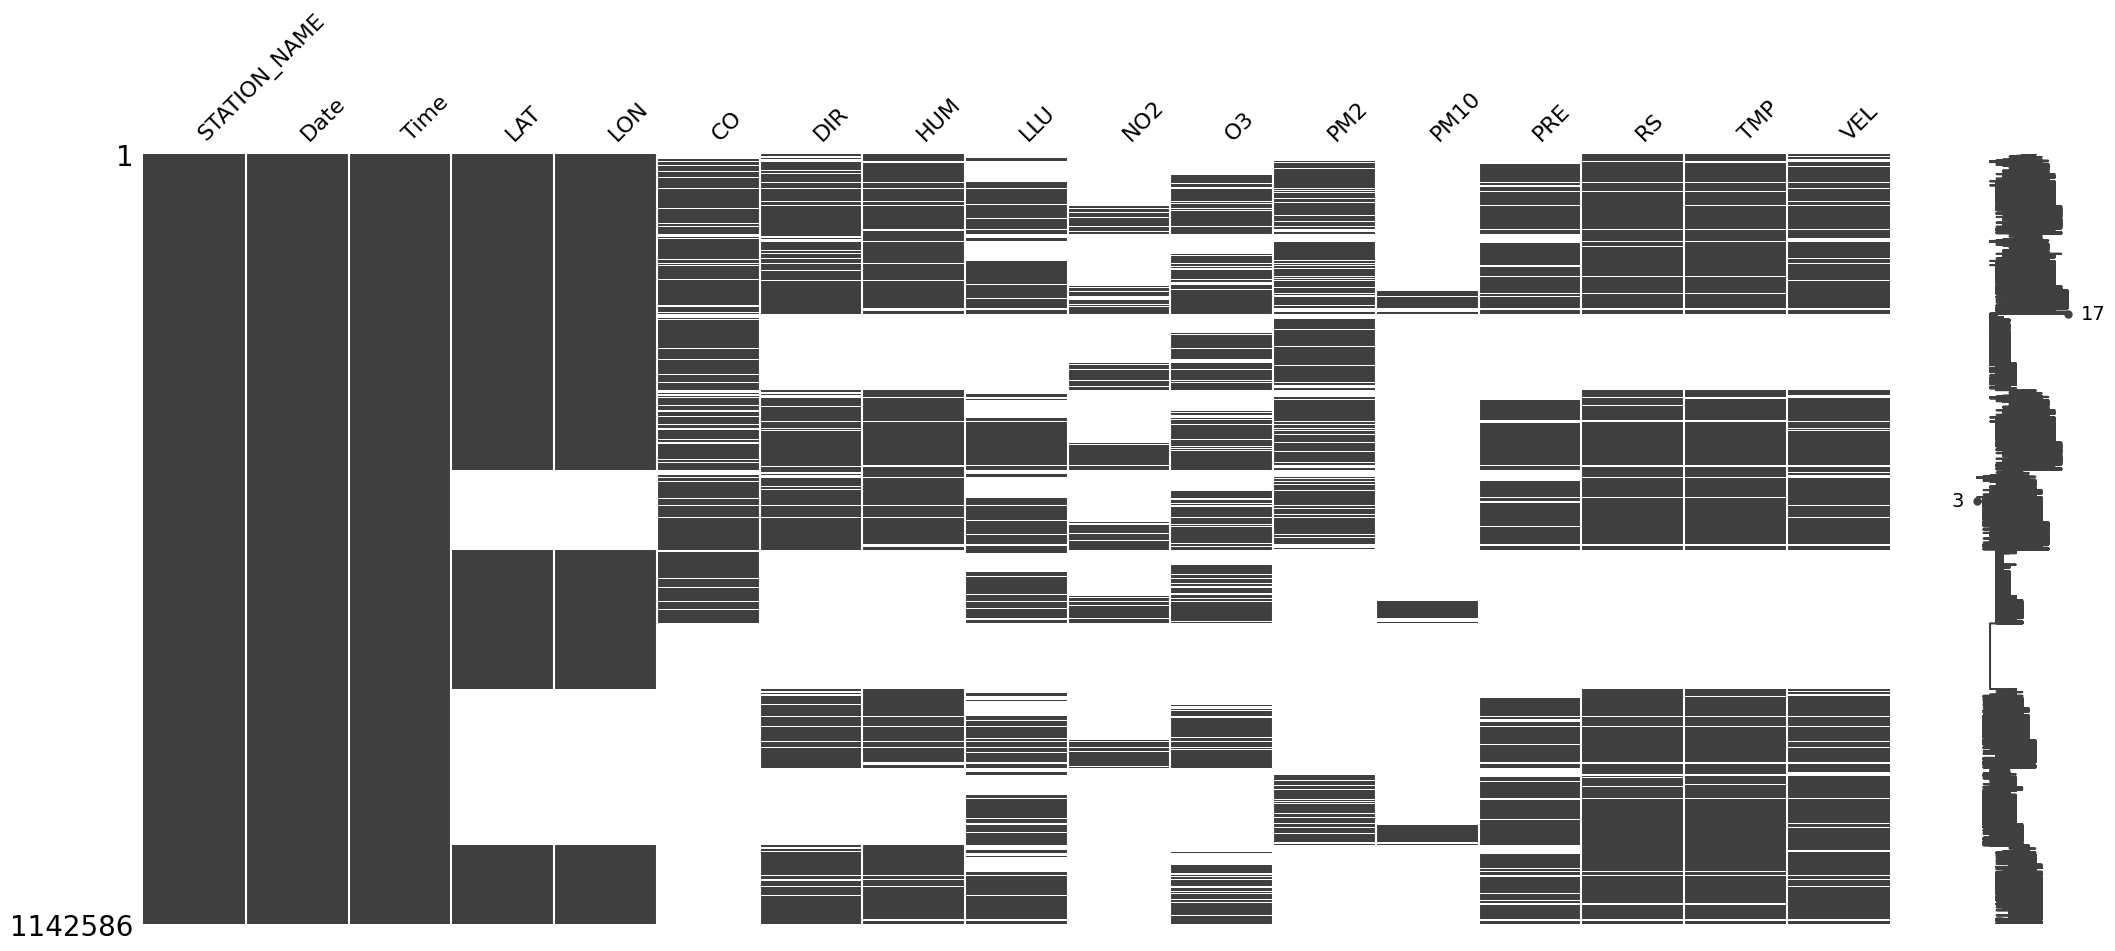

In [70]:
# ------------------------- LIMPIEZA DE DATA -----------------------
# Crear una nueva columna separando fecha y hora
final_df['Date_time'] = pd.to_datetime(final_df['Date_time'], errors='coerce', format='mixed')
final_df['Date'] = final_df['Date_time'].dt.date
final_df['Time'] = final_df['Date_time'].dt.time

# Eliminar columnas innecesarias
final_df.drop(columns=['Date_time'], inplace=True)

# Reordenar columnas
final_df = final_df[[
    "STATION_NAME", "Date", "Time", "LAT", "LON",
    "CO", "DIR", "HUM", "LLU", "NO2", "O3",
    "PM2", "PM10", "PRE", "RS", "TMP", "VEL"
]]

# Mostrar el gráfico de Missingno
msno.matrix(final_df)

C:\Users\user\AppData\Local\Temp\ipykernel_25876\3261827705.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_df = final_df.fillna(method='ffill').fillna(method='bfill')


,STATION_NAME,Date,Time,LAT,LON,CO,DIR,HUM,LLU,NO2,O3,PM2,PM10,PRE,RS,TMP,VEL
0,BELISARIO,2004-01-01,00:00:00,-0.184731,-78.495989,6.86,336.54,98.06,0.0,32.04,37.97,29.07,0.0,716.12,0.0,9.93,0.52
1,BELISARIO,2004-01-01,01:00:00,-0.184731,-78.495989,6.86,259.17,98.47,0.0,32.04,37.97,29.07,0.0,716.12,0.0,9.14,0.54
2,BELISARIO,2004-01-01,02:00:00,-0.184731,-78.495989,6.86,348.76,98.65,0.0,32.04,37.97,29.07,0.0,716.12,0.0,8.71,0.54
3,BELISARIO,2004-01-01,03:00:00,-0.184731,-78.495989,6.86,300.94,99.03,0.0,32.04,37.97,29.07,0.0,716.12,0.0,8.63,0.58
4,BELISARIO,2004-01-01,04:00:00,-0.184731,-78.495989,6.86,248.61,86.85,0.0,32.04,37.97,29.07,0.0,716.12,0.0,10.18,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142581,TUMBACO,2017-10-22,19:00:00,-0.214956,-78.403211,0.00,63.73,75.21,0.0,14.25,27.42,25.50,51.3,770.54,0.0,16.43,1.39
1142582,TUMBACO,2017-10-22,20:00:00,-0.214956,-78.403211,0.00,48.69,76.47,0.0,14.25,28.90,25.50,51.3,771.43,0.0,15.80,1.72
1142583,TUMBACO,2017-10-22,21:00:00,-0.214956,-78.403211,0.00,32.80,77.91,0.0,14.25,29.82,25.50,51.3,771.90,0.0,15.17,1.56
1142584,TUMBACO,2017-10-22,22:00:00,-0.214956,-78.403211,0.00,67.04,80.83,0.0,14.25,22.57,25.50,51.3,772.31,0.0,14.64,0.85


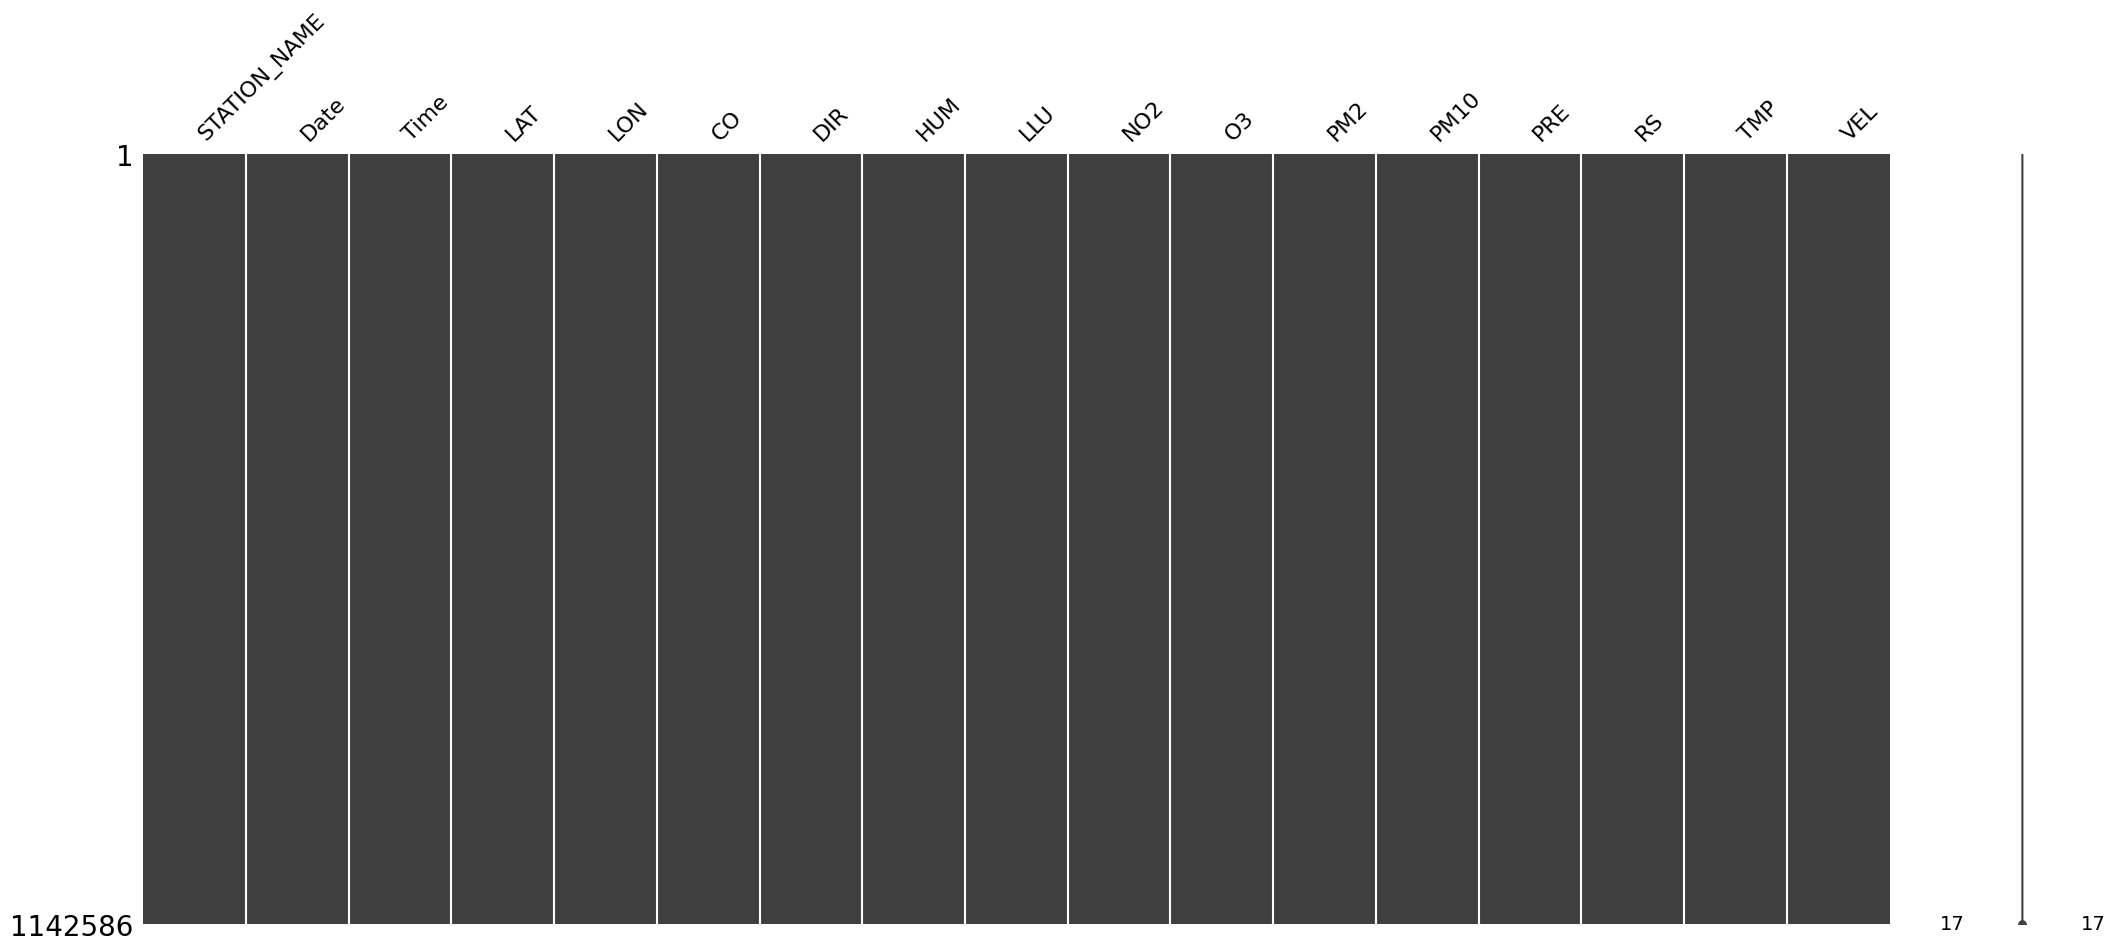

In [71]:
# ------------------------- LLENADO DE DATOS FALTANTES -----------------------
# Llenado de columnas con el metodo de ffill y bfill
filled_df = final_df.fillna(method='ffill').fillna(method='bfill')

# Mostrar el gráfico de Missingno después del llenado
msno.matrix(filled_df)
df = filled_df.copy()
df

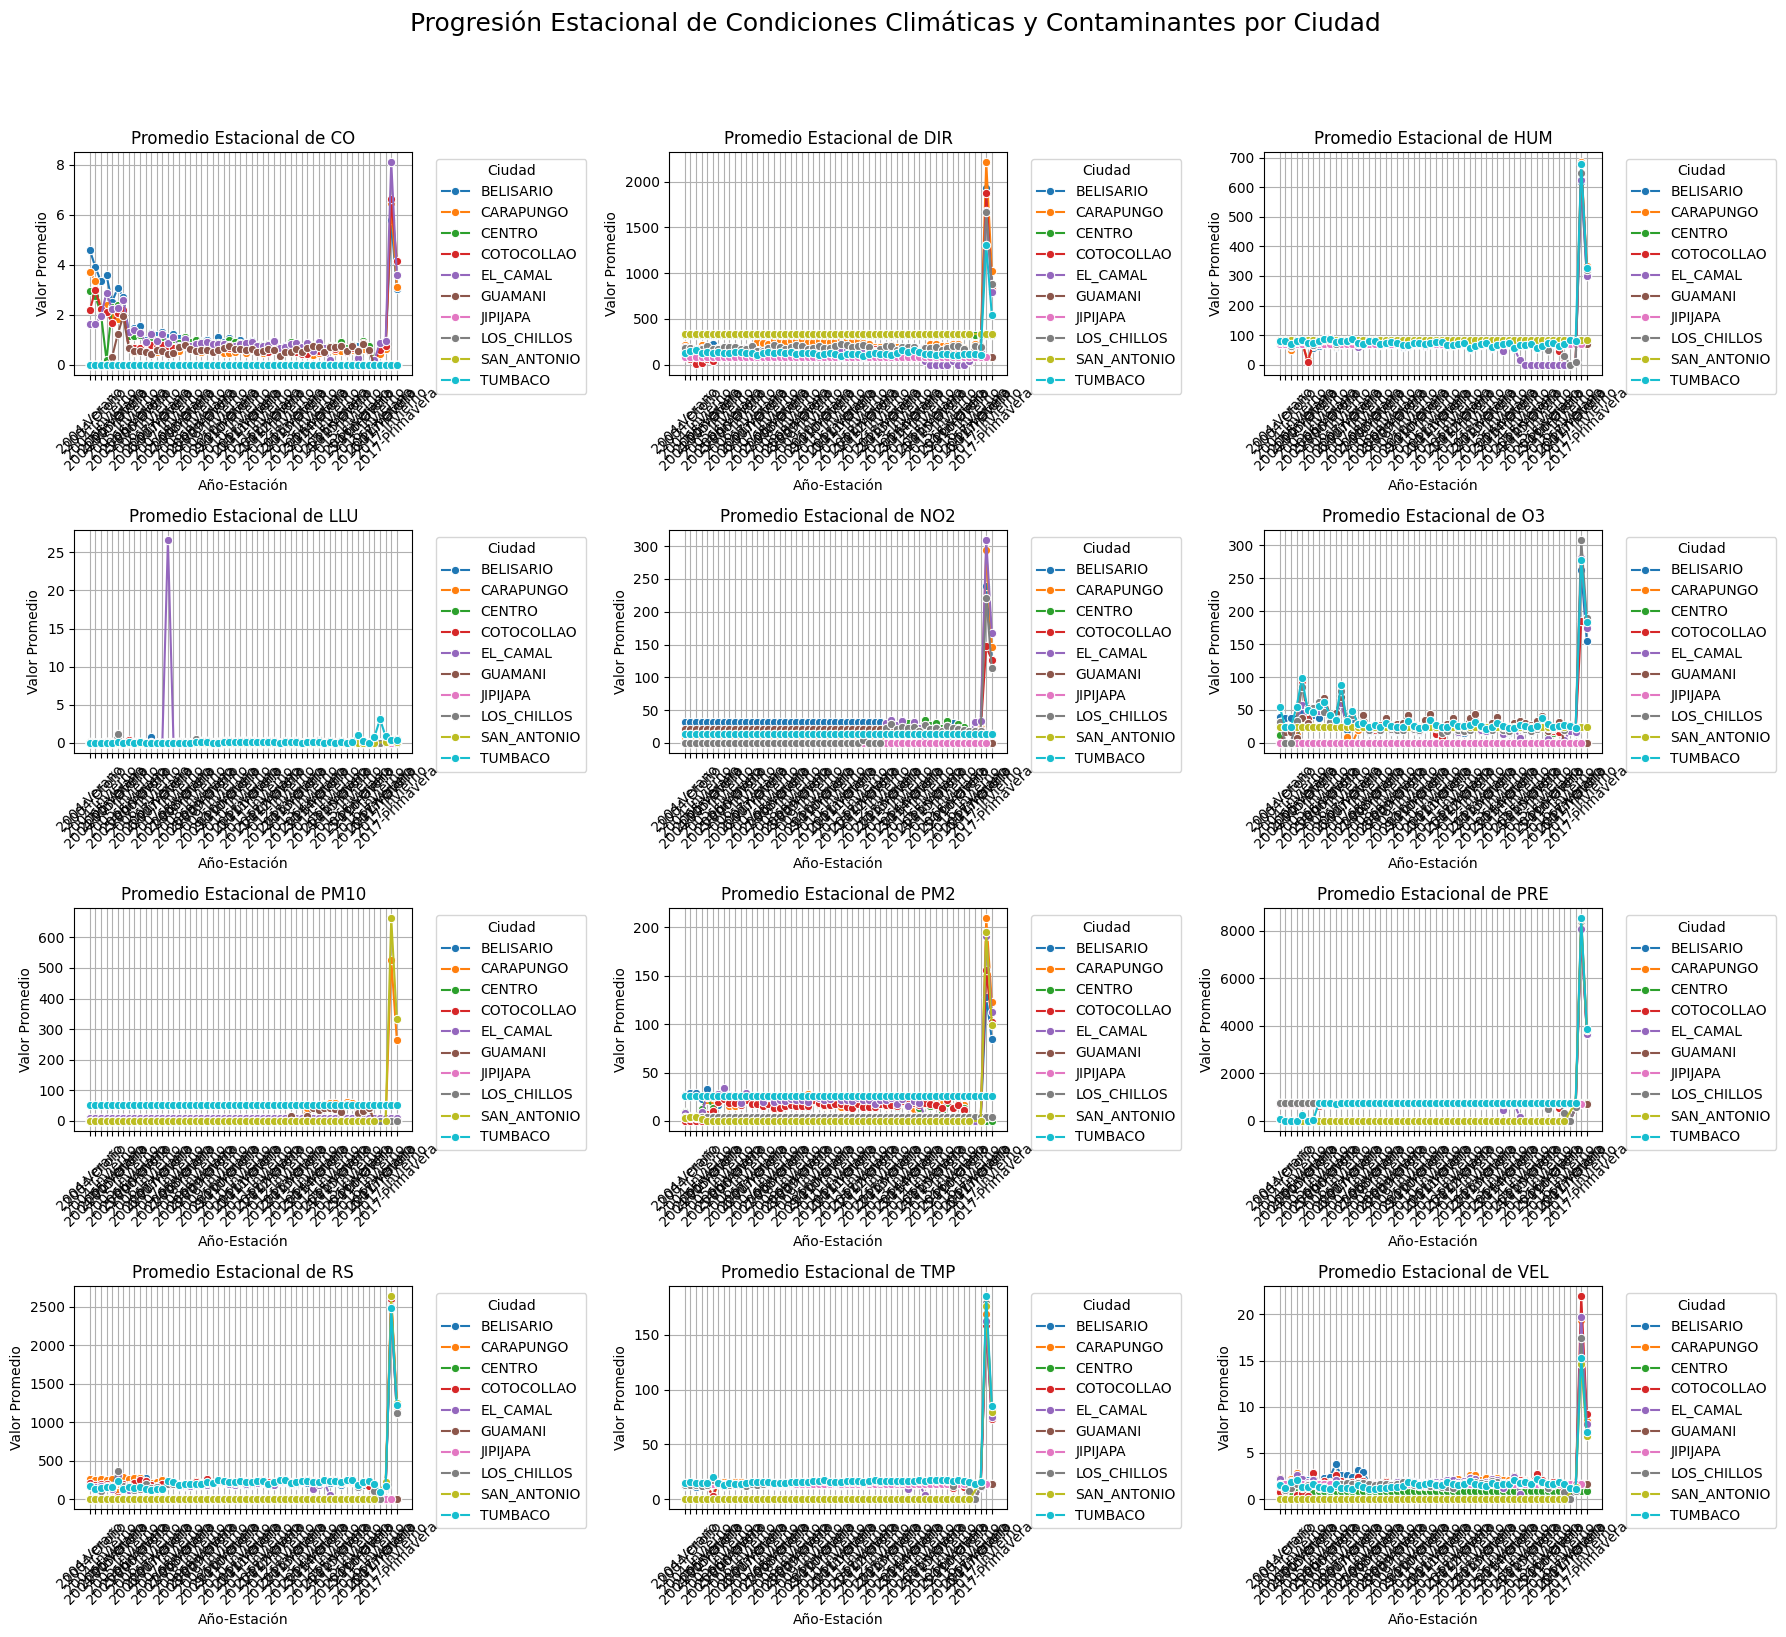

In [72]:
# Asegurarse que 'Date' es datetime y extraer el año
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Crear columna de estación del año (Ecuador: hemisferio sur)
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Verano'
    elif month in [3, 4, 5]:
        return 'Otoño'
    elif month in [6, 7, 8]:
        return 'Invierno'
    else:
        return 'Primavera'

df['Season'] = df['Date'].apply(get_season)

# Crear columna combinada para eje X
df['Year_Season'] = df['Year'].astype(str) + '-' + df['Season']

# Columnas de mediciones
measurement_columns = ["CO", "DIR", "HUM", "LLU", "NO2", "O3", "PM10", "PM2", "PRE", "RS", "TMP", "VEL"]

# Agrupar por Año-Estación y Ciudad, y calcular la media
seasonal_data = df.groupby(['Year_Season', 'STATION_NAME'])[measurement_columns].mean().reset_index()

# Ordenar Year_Season para que el eje X sea cronológico
season_order = sorted(df['Year_Season'].unique(), key=lambda x: (int(x.split('-')[0]), ['Verano','Otoño','Invierno','Primavera'].index(x.split('-')[1])))
seasonal_data['Year_Season'] = pd.Categorical(seasonal_data['Year_Season'], categories=season_order, ordered=True)

# Graficar cada medición en un subplot separado
num_cols_plot = 3
num_rows_plot = (len(measurement_columns) + num_cols_plot - 1) // num_cols_plot

plt.figure(figsize=(18, num_rows_plot * 4))
plt.suptitle('Progresión Estacional de Condiciones Climáticas y Contaminantes por Ciudad', fontsize=18, y=1.02)

for i, col_name in enumerate(measurement_columns):
    plt.subplot(num_rows_plot, num_cols_plot, i + 1)
    sns.lineplot(
        data=seasonal_data,
        x='Year_Season',
        y=col_name,
        hue='STATION_NAME',
        marker='o',
        legend=True
    )
    plt.title(f'Promedio Estacional de {col_name}')
    plt.xlabel('Año-Estación')
    plt.ylabel('Valor Promedio')
    plt.xticks(rotation=45)
    plt.legend(title='Ciudad', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.98])

In [73]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [75]:
# --- PREPARACIÓN DE DATOS ---
# Crear columna 'Date_time' combinando 'Date' y 'Time'
filled_df['Date_time'] = pd.to_datetime(filled_df['Date'].astype(str) + ' ' + filled_df['Time'].astype(str), errors='coerce')
filled_df['Year'] = filled_df['Date_time'].dt.year
filled_df['Month'] = filled_df['Date_time'].dt.month

results_list = []

for station in filled_df['STATION_NAME'].unique():
    station_df = filled_df[filled_df['STATION_NAME'] == station].copy()
    station_df = station_df.set_index('Date_time')
    
    for (year, month), monthly_df in station_df.groupby([station_df.index.year, station_df.index.month]):
        if monthly_df['PM2'].dropna().shape[0] < 10:
            continue

        # Crear dataset con lags
        station_pm2 = monthly_df[['PM2']].dropna()
        for i in range(1, 4):
            station_pm2[f'PM2_lag_{i}'] = station_pm2['PM2'].shift(i)
        station_pm2 = station_pm2.dropna()

        if station_pm2.shape[0] < 10:
            continue

        X = station_pm2[[f'PM2_lag_{i}' for i in range(1, 4)]]
        y = station_pm2['PM2']

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, shuffle=False)

        model = XGBRegressor(
            n_estimators=500,
            learning_rate=0.05,
            max_depth=5,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            eval_metric="rmse"
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df_results = pd.DataFrame({
            'Date_time': y_test.index,
            'PM2_real': y_test.values,
            'PM2_pred': y_pred,
            'STATION_NAME': station,
            'Year': year,
            'Month': month
        })
        results_list.append(df_results)

C:\Users\user\AppData\Local\Temp\ipykernel_25876\2013550142.py:53: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\user\AppData\Local\Temp\ipykernel_25876\2013550142.py:53: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
c:\Users\user\GitRepositories\UDLA\inteligencia_artificial_2\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\GitRepositories\UDLA\inteligencia_artificial_2\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


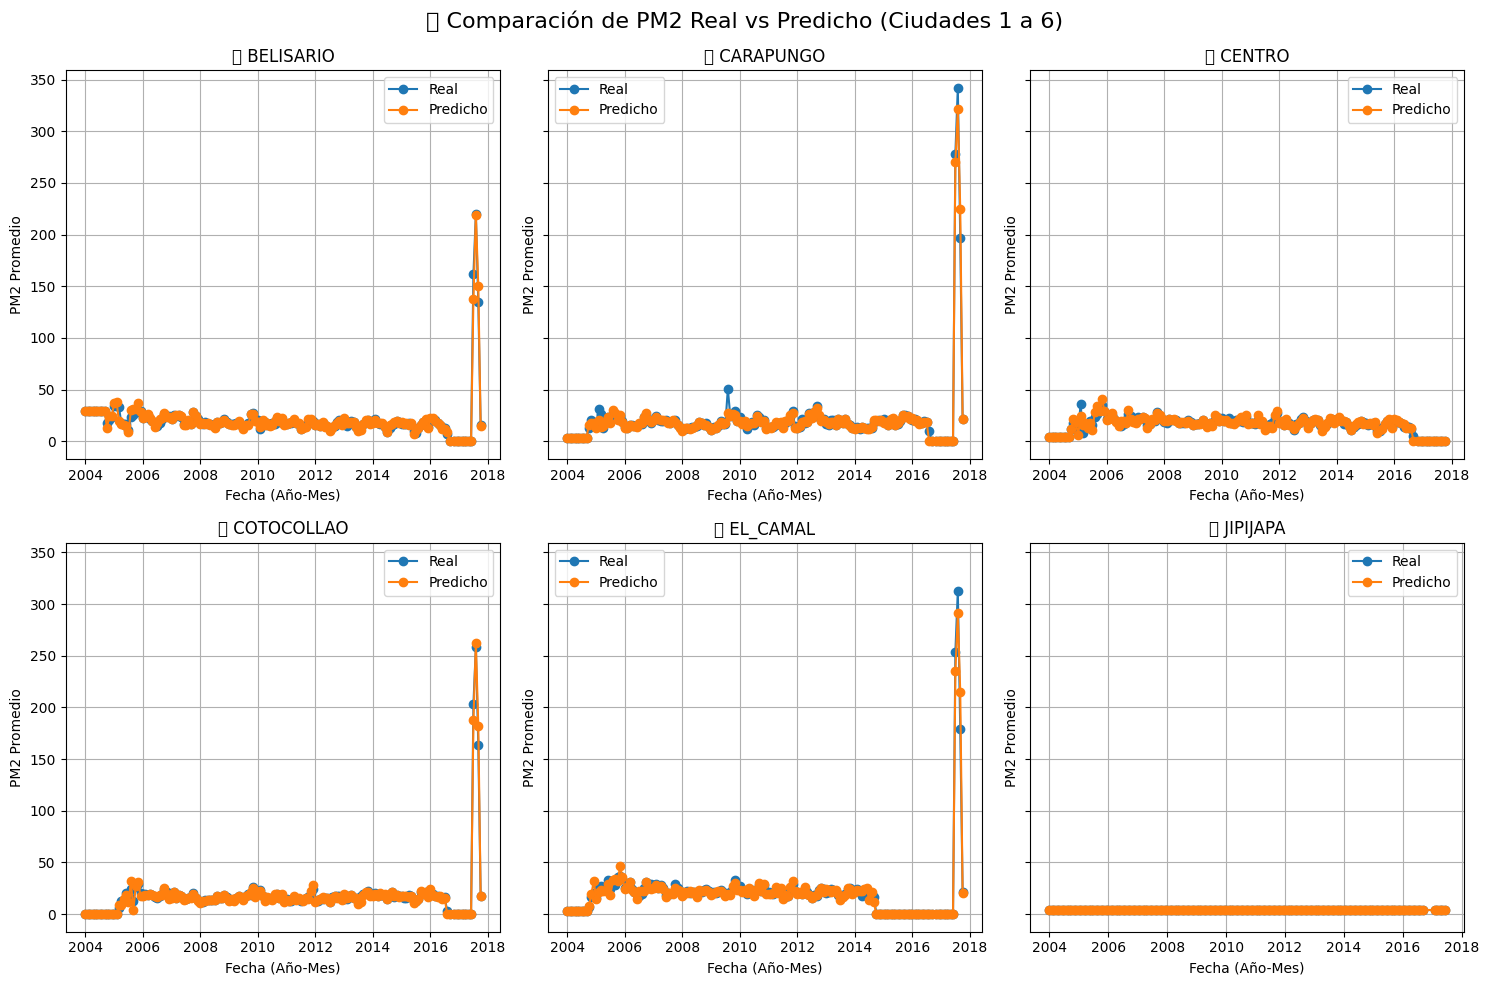

C:\Users\user\AppData\Local\Temp\ipykernel_25876\2013550142.py:53: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\user\AppData\Local\Temp\ipykernel_25876\2013550142.py:53: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
c:\Users\user\GitRepositories\UDLA\inteligencia_artificial_2\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\GitRepositories\UDLA\inteligencia_artificial_2\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


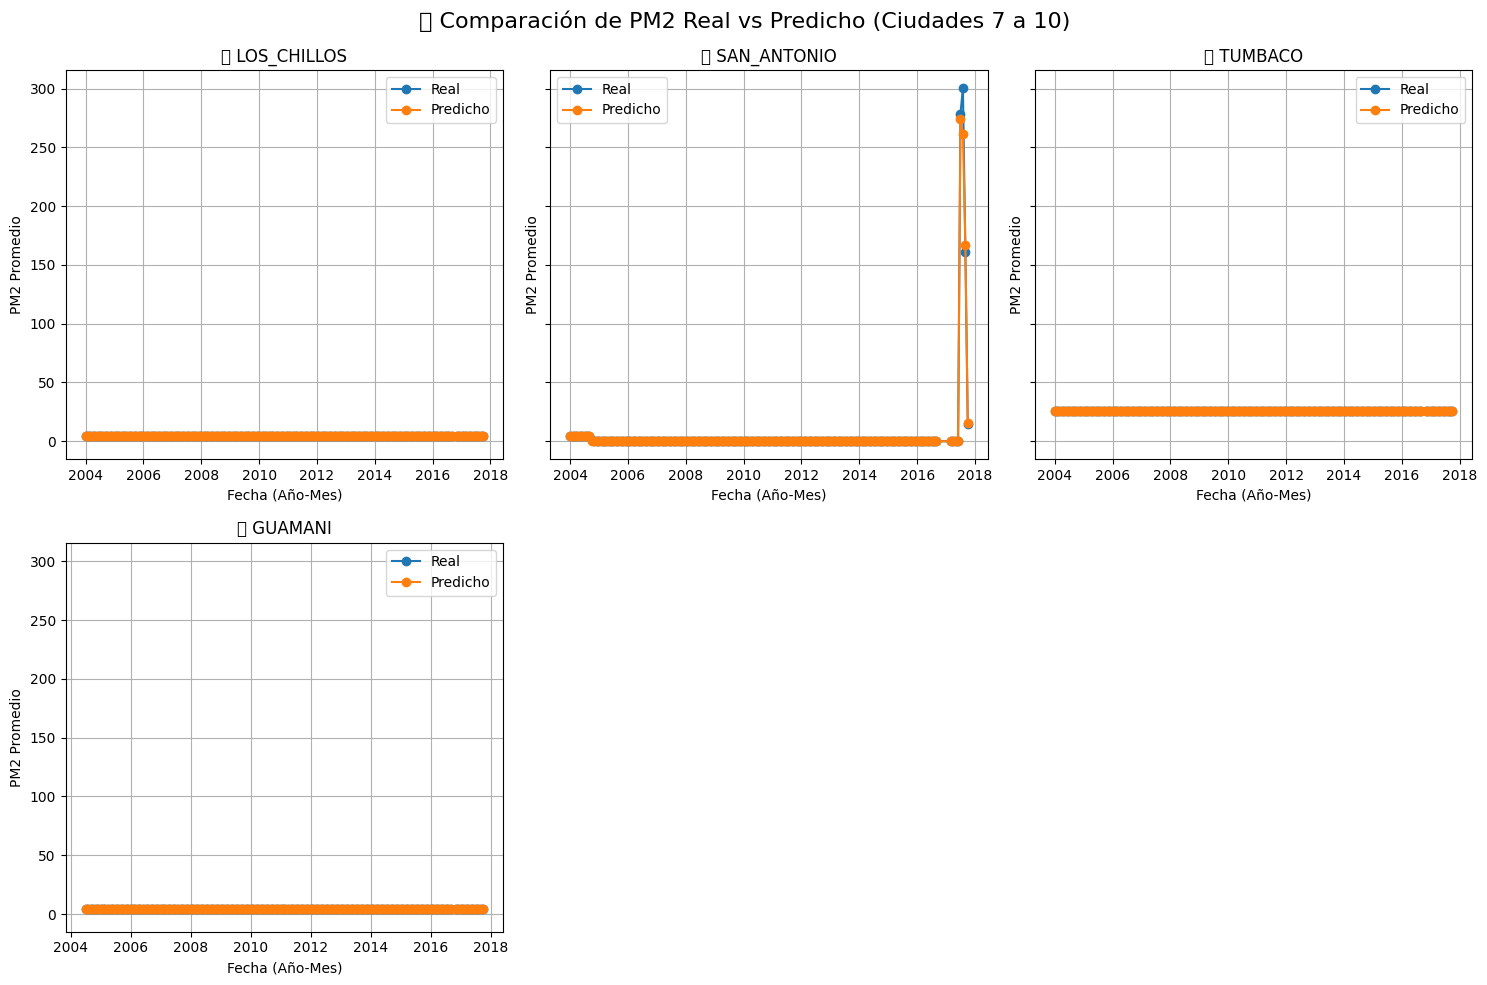

In [76]:
# --- UNIR Y GRAFICAR ---
if results_list:
    all_results = pd.concat(results_list)
    all_results['Date_time'] = pd.to_datetime(all_results['Date_time'])
    all_results['Year'] = all_results['Date_time'].dt.year
    all_results['Month'] = all_results['Date_time'].dt.month

    # Promedio mensual real por ciudad (de filled_df)
    real_pm2_monthly = (
        filled_df[['Date_time', 'STATION_NAME', 'PM2']]
        .dropna()
        .assign(Year=filled_df['Date_time'].dt.year, Month=filled_df['Date_time'].dt.month)
        .groupby(['Year', 'Month', 'STATION_NAME'])['PM2']
        .mean()
        .reset_index()
        .rename(columns={'PM2': 'PM2_real'})
    )

    # Promedio mensual predicho por ciudad (de all_results)
    pred_pm2_monthly = (
        all_results.groupby(['Year', 'Month', 'STATION_NAME'])['PM2_pred']
        .mean()
        .reset_index()
        .rename(columns={'PM2_pred': 'PM2_predicted'})
    )

    # Combinar ambos DataFrames para comparación mensual
    combined_df = pd.merge(real_pm2_monthly, pred_pm2_monthly, on=['Year', 'Month', 'STATION_NAME'], how='inner')
    cities = combined_df['STATION_NAME'].unique()
    n_per_fig = 6  # 3 filas * 2 columnas

    for start_idx in range(0, len(cities), n_per_fig):
        subset_cities = cities[start_idx:start_idx + n_per_fig]
        n_rows = 2
        n_cols = 3
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), sharey=True)
        axes = axes.flatten()
        for ax_idx, ax in enumerate(axes):
            if ax_idx < len(subset_cities):
                city = subset_cities[ax_idx]
                city_df = combined_df[combined_df['STATION_NAME'] == city].copy()
                city_df['YearMonth'] = pd.to_datetime(city_df[['Year', 'Month']].assign(DAY=1))
                ax.plot(city_df['YearMonth'], city_df['PM2_real'], label='Real', marker='o')
                ax.plot(city_df['YearMonth'], city_df['PM2_predicted'], label='Predicho', marker='o')
                ax.set_title(f'📍 {city}')
                ax.set_xlabel('Fecha (Año-Mes)')
                ax.set_ylabel('PM2 Promedio')
                ax.grid(True)
                ax.legend()
            else:
                fig.delaxes(ax)
        plt.suptitle(f'📈 Comparación de PM2 Real vs Predicho (Ciudades {start_idx+1} a {start_idx+len(subset_cities)})', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.subplots_adjust(top=0.92)
        plt.show()
else:
    print("\n⚠️ No se entrenó ningún modelo (no había suficientes datos).")